# Car Price Prediction

**Objective - To predict the car price using machine learning**

## Step 1 - Import the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('CarPriceprediction.csv')

In [3]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


* Average Price: The mean price of the cars is 13276 with a minimum price of 5,118 and a maximum price of 45,400.
  
* Most cars fall between 7,788 and 16,503, indicating a mid-range pricing structure for the majority of the dataset. 

#### Car Symboling (Risk Factor):
* Mean: 0.834, with values ranging from -2 to 3.
* Cars are classified from -2 to 3, with negative values representing safer cars and higher values indicating more risky ones. The average car in this dataset is slightly risky.

In [6]:
df['symboling'].value_counts()

symboling
 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: count, dtype: int64

<Axes: ylabel='symboling'>

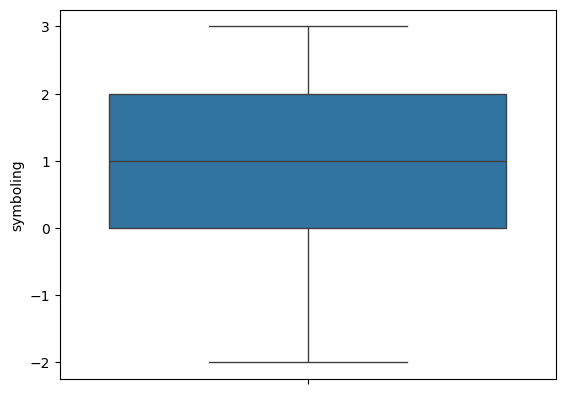

In [7]:
sns.boxplot(y=df['symboling'])

C:\Users\sanik\AppData\Local\Temp\ipykernel_3788\2179349053.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['symboling'])


<Axes: xlabel='symboling', ylabel='Density'>

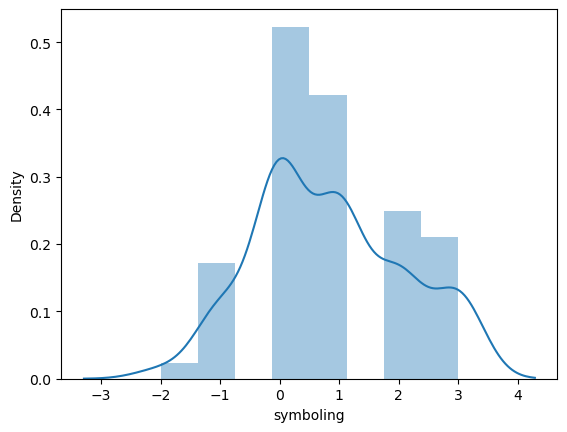

In [8]:
sns.distplot(df['symboling'])

* maximum cars have 0 and 1 symboling value

<Axes: xlabel='symboling', ylabel='price'>

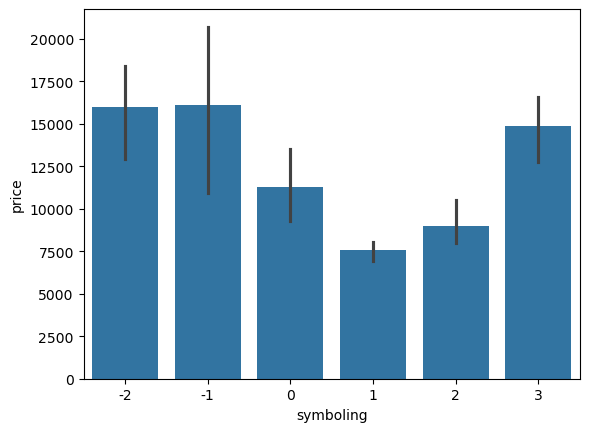

In [9]:
sns.barplot(x='symboling', y='price', data=df, estimator=np.median)

* Cars with lesser (-2 and -3) symoling value have higher car price.
* As symboling price increases the price is also increasing which means there are some other factor responsible for car price.

#### Car Aspiration
##### aspiration refers to the method by which air is delivered to the engine's combustion chambers for the air-fuel mixture.

In [10]:
df['aspiration'].value_counts()

aspiration
std      168
turbo     37
Name: count, dtype: int64

<Axes: xlabel='aspiration', ylabel='price'>

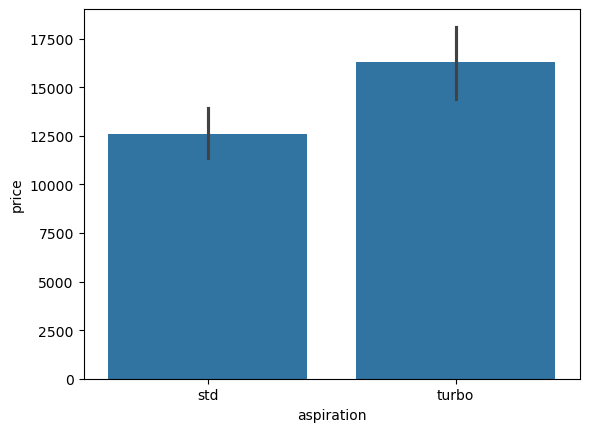

In [11]:
sns.barplot(x='aspiration', y='price', data=df, estimator=np.mean)

* Cars with torbo aspiration value have high price

#### Car Drivewheel

<Axes: xlabel='drivewheel', ylabel='price'>

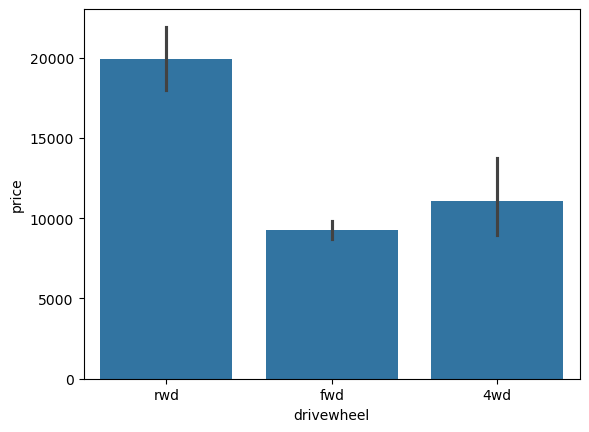

In [12]:
sns.barplot(x='drivewheel', y='price', data=df, estimator=np.mean)

In [13]:
df['drivewheel'].value_counts()

drivewheel
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64

#### Car Weight

C:\Users\sanik\AppData\Local\Temp\ipykernel_3788\3588535299.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['curbweight'])


<Axes: xlabel='curbweight', ylabel='Density'>

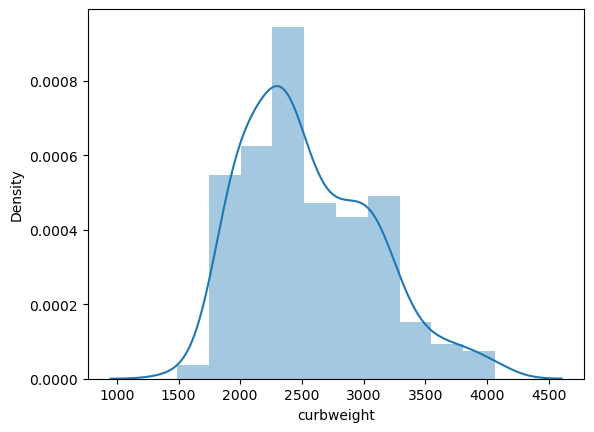

In [14]:
sns.distplot(df['curbweight'])

* Majority of cars are concentrated between 2000 to 2500 curbweight (weight of car without passanger)

<Axes: xlabel='curbweight', ylabel='price'>

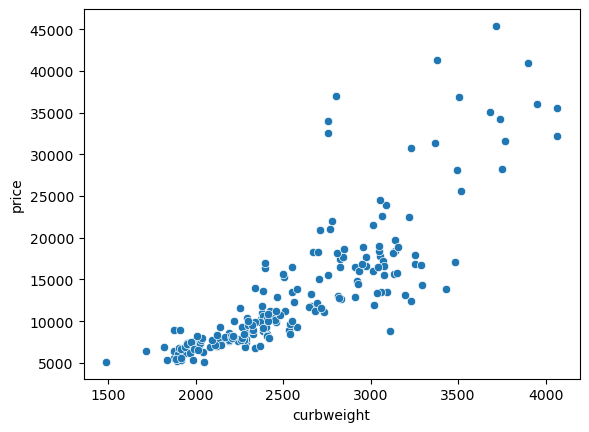

In [15]:
sns.scatterplot(x='curbweight', y='price', data=df)

* As the curb weight of car is increasing the price is also increasing 
* In some cases the the weight is increasing but price is down due to other factors

#### Stroke

C:\Users\sanik\AppData\Local\Temp\ipykernel_3788\3547463052.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['stroke'])


<Axes: xlabel='stroke', ylabel='Density'>

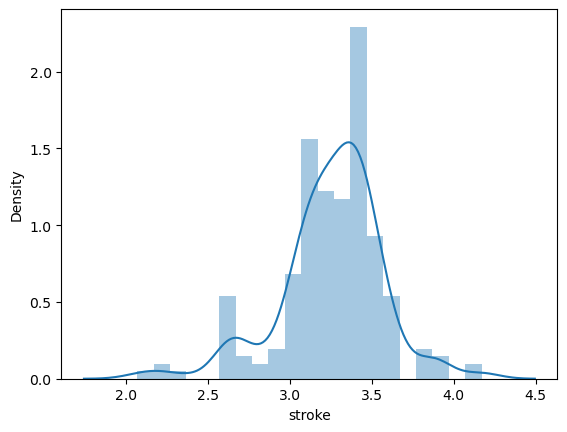

In [16]:
sns.distplot(df['stroke'])

* Maximum car having 3 to 3.5 stroke

<Axes: xlabel='stroke', ylabel='price'>

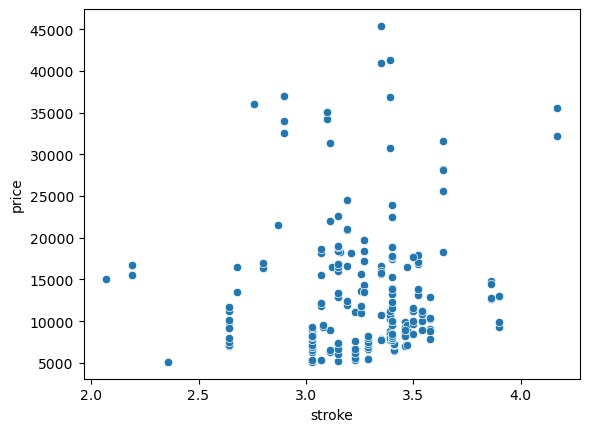

In [17]:
sns.scatterplot(x='stroke', y='price', data=df)

#### Compression Ratio

C:\Users\sanik\AppData\Local\Temp\ipykernel_3788\3651417679.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['compressionratio'])


<Axes: xlabel='compressionratio', ylabel='Density'>

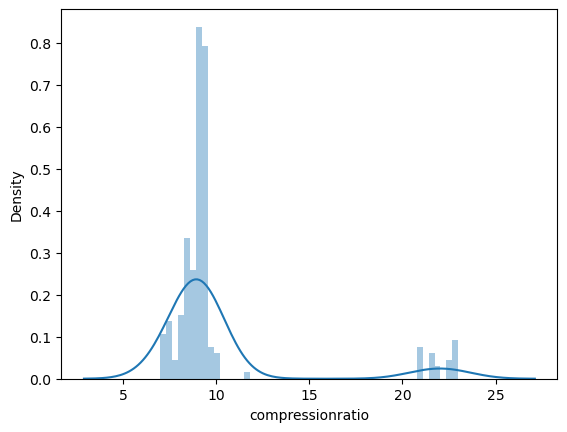

In [18]:
sns.distplot(df['compressionratio'])

* Maximum car having high Compression ratio

<Axes: xlabel='compressionratio', ylabel='price'>

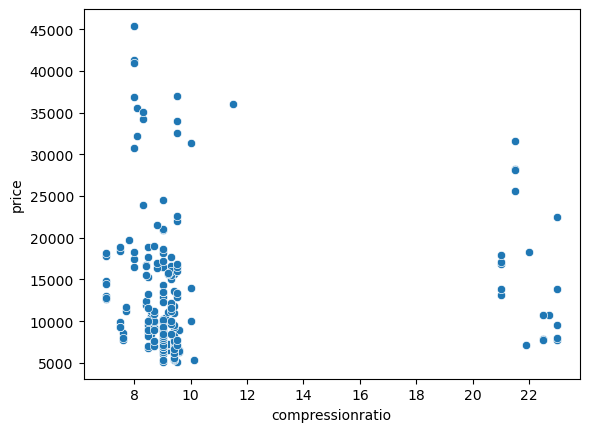

In [19]:
sns.scatterplot(x='compressionratio', y='price', data=df)

C:\Users\sanik\AppData\Local\Temp\ipykernel_3788\444587821.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

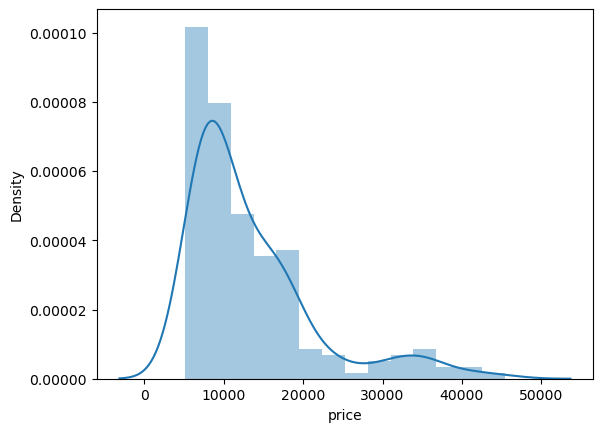

In [20]:
sns.distplot(df['price'])

<Axes: ylabel='price'>

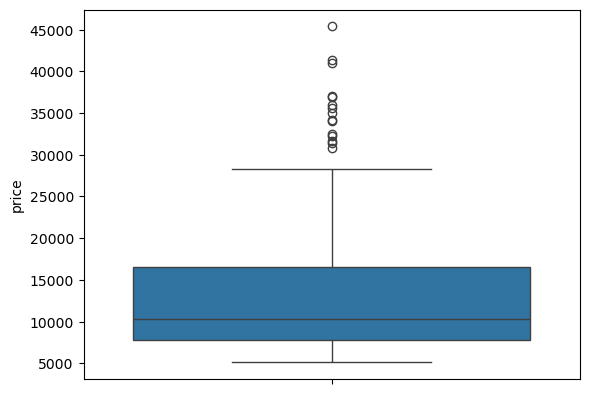

In [21]:
sns.boxplot(df['price'])

* Few cars from the data are highly priced (above 40,000)
* Average Price: The mean price of the cars is 13276 with a minimum price of 5,118 and a maximum price of 45,400.
* Most cars fall between 10,000 and 15000 indicating a mid-range pricing structure for the majority of the dataset.

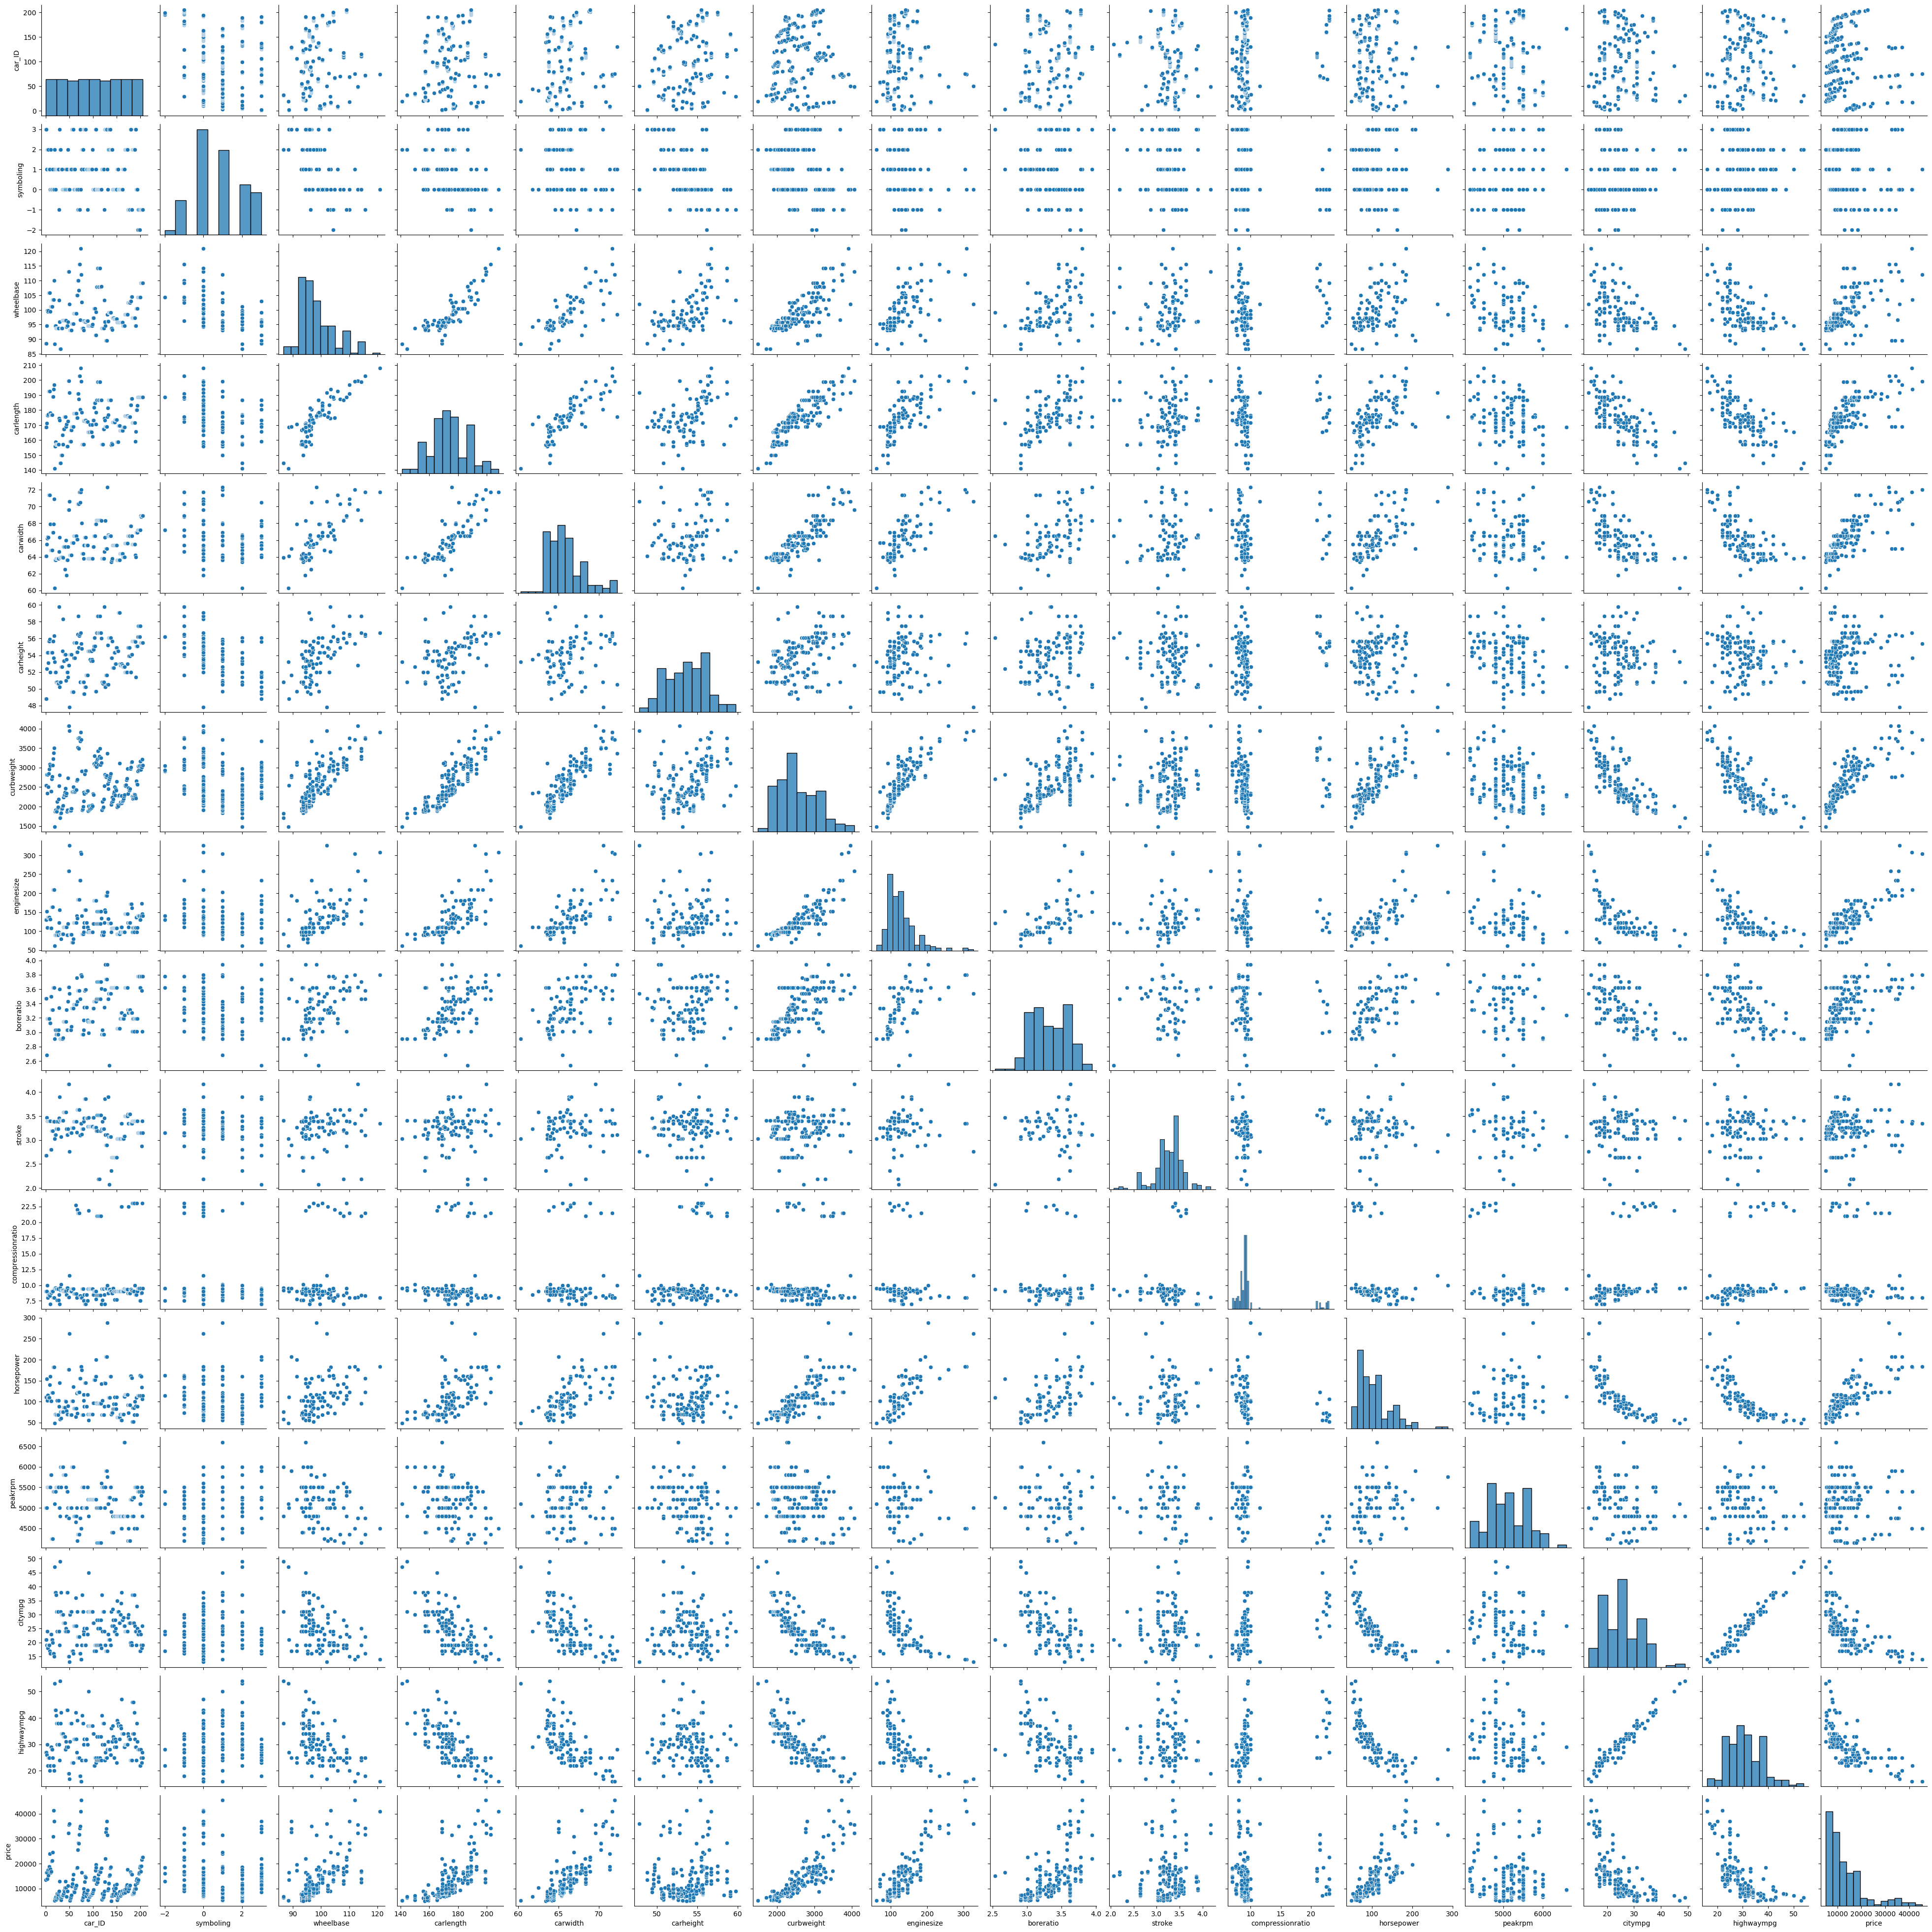

In [22]:
sns.pairplot(df)

In [23]:
plt.figure(figsize=(16,8))
sns.heatmap(cor,cmap='YlGnBl',annote=True)
plt.show

NameError: name 'cor' is not defined

<Figure size 1600x800 with 0 Axes>

In [24]:
cor = df.corr()
cor

ValueError: could not convert string to float: 'alfa-romero giulia'

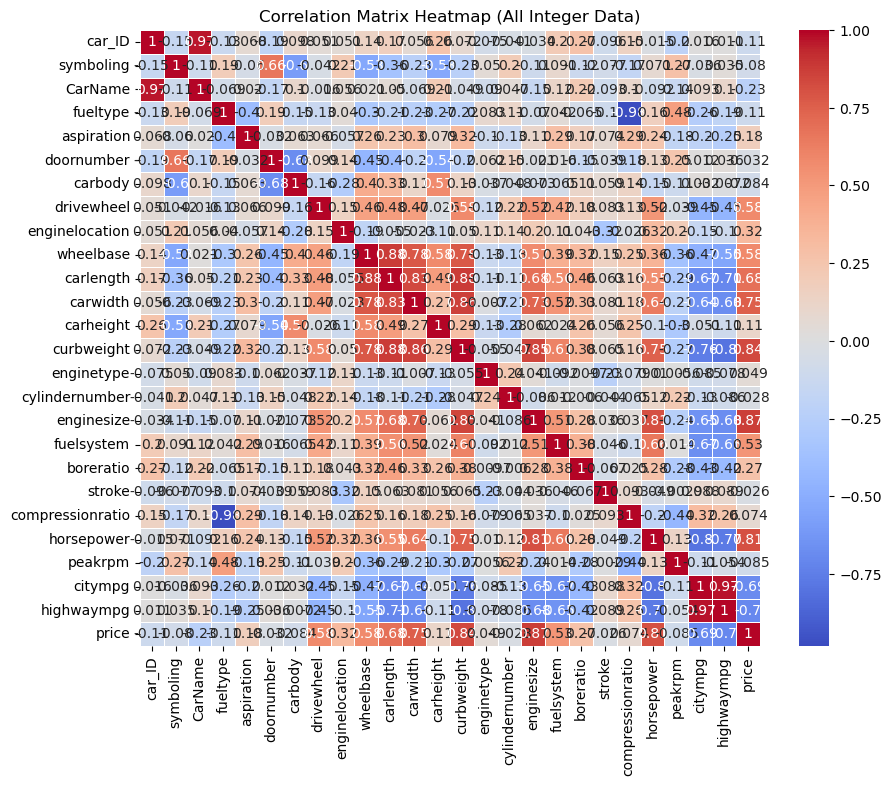

In [25]:
df_encoded = df.apply(lambda col: col.astype('category').cat.codes if col.dtypes == 'object' else col)

# Step 2: Ensure there are no missing or invalid data points (if there are missing values, handle them)
df_encoded.fillna(0, inplace=True)  # Filling NaN values with 0 (you can handle missing data as needed)

# Step 3: Convert all values to integers
df_encoded = df_encoded.astype(int)

# Step 4: Compute the correlation matrix
corr_matrix = df_encoded.corr()

# Step 5: Plot a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap (All Integer Data)')
plt.show()

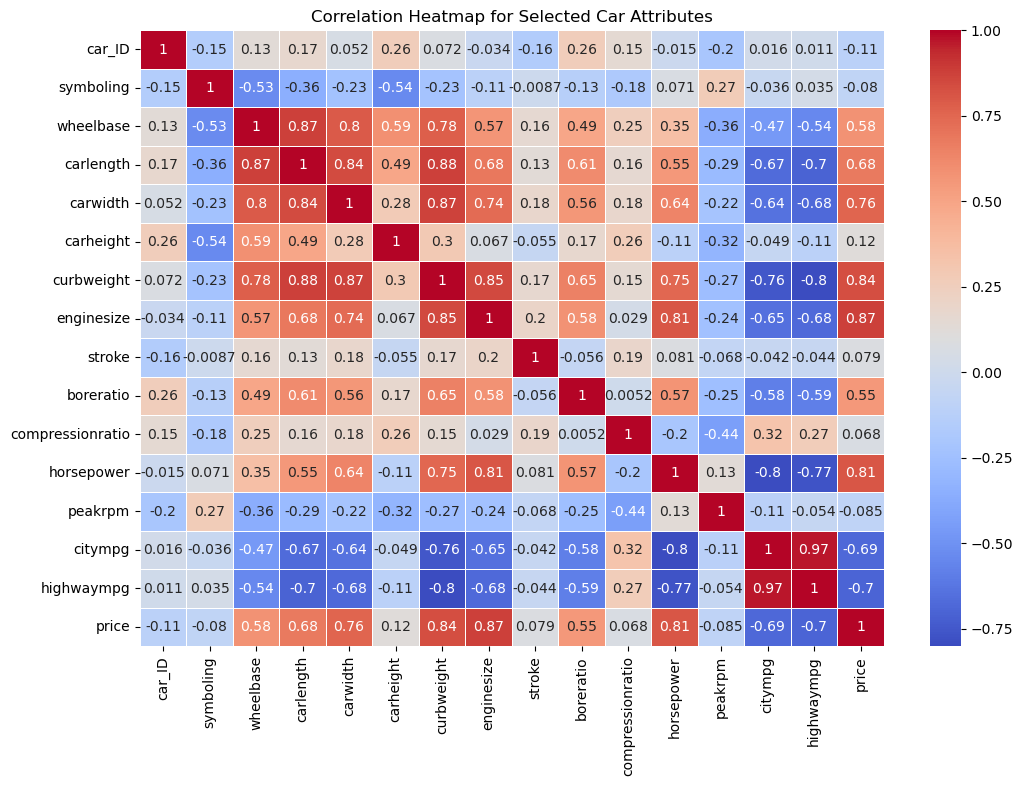

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Step 1: Select the specific columns for the heatmap
columns_to_include = ['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth', 
                      'carheight','curbweight', 'enginesize', 'stroke', 'boreratio', 
                      'compressionratio', 'horsepower', 'peakrpm', 
                      'citympg', 'highwaympg', 'price']

# Filter DataFrame to keep only the required columns
df_filtered = df[columns_to_include]

# Step 2: Convert to numeric if necessary (ignoring non-convertible data)
# Fill missing values and convert to appropriate numeric types if needed
df_filtered = df_filtered.apply(pd.to_numeric, errors='coerce')  # Convert to numeric
df_filtered.fillna(0, inplace=True)  # Handling missing data (you can customize this)

# Step 3: Compute the correlation matrix
corr_matrix = df_filtered.corr()

# Step 4: Plot a heatmap
plt.figure(figsize=(12, 8))  # Adjust size as needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap for Selected Car Attributes')
plt.show()


## Data cleaning

In [29]:
# checking missing values
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

* No null values present

In [30]:
df.isnull().any()

car_ID              False
symboling           False
CarName             False
fueltype            False
aspiration          False
doornumber          False
carbody             False
drivewheel          False
enginelocation      False
wheelbase           False
carlength           False
carwidth            False
carheight           False
curbweight          False
enginetype          False
cylindernumber      False
enginesize          False
fuelsystem          False
boreratio           False
stroke              False
compressionratio    False
horsepower          False
peakrpm             False
citympg             False
highwaympg          False
price               False
dtype: bool

In [34]:
df['CarName'].value_counts()

CarName
toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: count, Length: 147, dtype: int64

In [36]:
df['company_name']=df['CarName'].apply(lambda x : x.split(" ")[0])
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company_name
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo


In [37]:
df['company_name'].astype('category').value_counts()

company_name
toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
dodge           9
volkswagen      9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
isuzu           4
porsche         4
chevrolet       3
jaguar          3
alfa-romero     3
vw              2
renault         2
maxda           2
porcshce        1
toyouta         1
vokswagen       1
mercury         1
Nissan          1
Name: count, dtype: int64

In [39]:
# correcting spellings
df.loc[(df['company_name'])=='toyouta','company_name']='toyota'

In [41]:
df.loc[(df['company_name'])=='porcshce','company_name']='porsche'

In [41]:
df.loc[(df['company_name'])=='porcshce','company_name']='porsche'

In [44]:
df.loc[(df['company_name'])=='Nissan','company_name']='nissan'

In [45]:
df['company_name'].astype('category').value_counts()

company_name
toyota         32
nissan         18
mazda          15
mitsubishi     13
honda          13
subaru         12
peugeot        11
volvo          11
volkswagen     10
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
alfa-romero     3
jaguar          3
chevrolet       3
renault         2
maxda           2
vw              2
mercury         1
Name: count, dtype: int64

In [46]:
new_df = df.drop('CarName',axis=1)

In [47]:
new_df

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company_name
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,gas,std,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo
201,202,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo
202,203,-1,gas,std,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo
203,204,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo
